In [283]:
# import sys

# !{sys.executable} -m pip install librosa

In [284]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import os
from scipy.fft import fft, fftfreq
import wave

In [285]:
base_dir = os.getcwd()
note_file = base_dir + '\\notes\\D5.wav'

In [286]:
with wave.open(note_file, "r") as wave_file:
    frame_rate = wave_file.getframerate()
    frames = wave_file.getnframes()
    duration = frames / float(frame_rate)
    print(f'Frame rate: {frame_rate} Hz')
    print(f'Duration: {duration:.3f} s')
    print(f'Frames: {frames}')

Frame rate: 44100 Hz
Duration: 3.160 s
Frames: 139368


In [287]:
ipd.Audio(note_file)

In [288]:
yt, _ = librosa.load(note_file, sr=None)

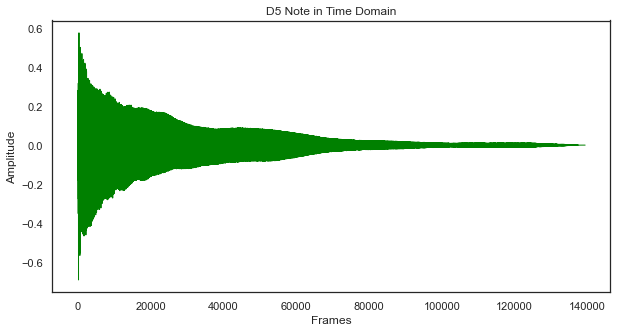

In [289]:
pd.Series(yt).plot(figsize=(10, 5),
                   lw=1,
                   title='D5 Note in Time Domain',
                   xlabel='Frames',
                   ylabel='Amplitude',
                   color='green')
plt.show()

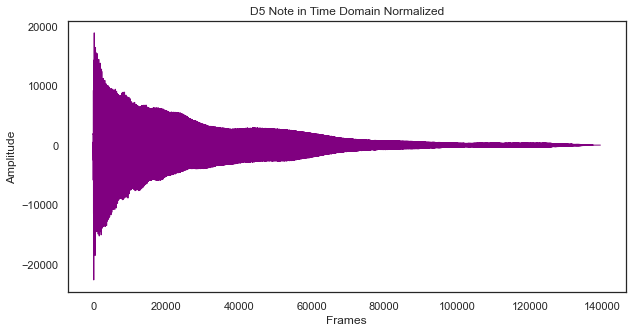

In [290]:
yt_norm = np.int16(yt * 32767)

pd.Series(yt_norm).plot(figsize=(10, 5),
                       lw=1,
                       title='D5 Note in Time Domain Normalized',
                       xlabel='Frames',
                       ylabel='Amplitude',
                       color='purple')
plt.show()

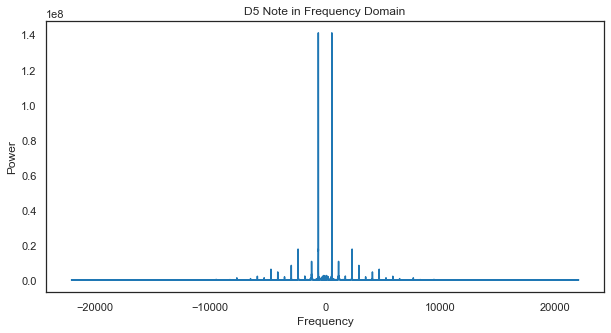

In [291]:
window_len = int(frame_rate * duration)

yf = fft(yt_norm)
xf = fftfreq(window_len, 1 / frame_rate)

yf_abs = np.abs(yf)

plt.figure(figsize=(10, 5))
plt.title('D5 Note in Frequency Domain')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.plot(xf, yf_abs)

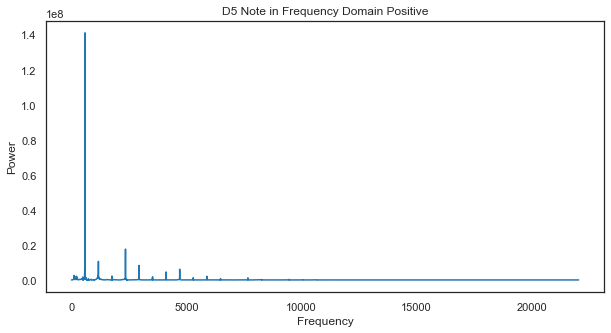

In [292]:
xf_pos = xf[:len(xf)//2]
yf_pos = yf_abs[:len(xf)//2]

plt.figure(figsize=(10, 5))
plt.title('D5 Note in Frequency Domain Positive')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.plot(xf_pos, yf_pos)

In [293]:
max_power_freq = xf_pos[np.argmax(yf_pos)]
print(f'Max Power Frequency: {max_power_freq:.2f}')

Max Power Frequency: 586.97


In [294]:
notes_dict = {
'C0':16.35,
'C1':32.70,
'C2':65.41,
'C3':130.81,
'C4':261.63,
'C5':523.25,
'C6':1046.50,
'C7':2093.00,
'C8':4186.01,
'C#/Db0':17.32,
'C#/Db1':34.65,
'C#/Db2':69.30,
'C#/Db3':138.59,
'C#/Db4':277.18,
'C#/Db5':554.37,
'C#/Db6':1108.73,
'C#/Db7':2217.46,
'C#/Db8':4434.92,
'D0':18.35,
'D1':36.71,
'D2':73.42,
'D3':146.83,
'D4':293.66,
'D5':587.33,
'D6':1174.66,
'D7':2349.32,
'D8':4698.63,
'D#/Eb0':19.45,
'D#/Eb1':38.89,
'D#/Eb2':77.78,
'D#/Eb3':155.56,
'D#/Eb4':311.13,
'D#/Eb5':622.25,
'D#/Eb6':1244.51,
'D#/Eb7':2489.02,
'D#/Eb8':4978.03,
'E0':20.60,
'E1':41.20,
'E2':82.41,
'E3':164.81,
'E4':329.63,
'E5':659.25,
'E6':1318.51,
'E7':2637.02,
'E8':5274.04,
'F0':21.83,
'F1':43.65,
'F2':87.31,
'F3':174.61,
'F4':349.23,
'F5':698.46,
'F6':1396.91,
'F7':2793.83,
'F8':5587.65,
'F#/Gb0':23.12,
'F#/Gb1':46.25,
'F#/Gb2':92.50,
'F#/Gb3':185.00,
'F#/Gb4':369.99,
'F#/Gb5':739.99,
'F#/Gb6':1479.98,
'F#/Gb7':2959.96,
'F#/Gb8':5919.91,
'G0':24.50,
'G1':49.00,
'G2':98.00,
'G3':196.00,
'G4':392.00,
'G5':783.99,
'G6':1567.98,
'G7':3135.96,
'G8':6271.93,
'G#/Ab0':25.96,
'G#/Ab1':51.91,
'G#/Ab2':103.83,
'G#/Ab3':207.65,
'G#/Ab4':415.30,
'G#/Ab5':830.61,
'G#/Ab6':1661.22,
'G#/Ab7':3322.44,
'G#/Ab8':6644.88,
'A0':27.50,
'A1':55.00,
'A2':110.00,
'A3':220.00,
'A4':440.00,
'A5':880.00,
'A6':1760.00,
'A7':3520.00,
'A8':7040.00,
'A#/Bb0':29.14,
'A#/Bb1':58.27,
'A#/Bb2':116.54,
'A#/Bb3':233.08,
'A#/Bb4':466.16,
'A#/Bb5':932.33,
'A#/Bb6':1864.66,
'A#/Bb7':3729.31,
'A#/Bb8':7458.62,
'B0':30.87,
'B1':61.74,
'B2':123.47,
'B3':246.94,
'B4':493.88,
'B5':987.77,
'B6':1975.53,
'B7':3951.07,
'B8':7902.13
}

In [295]:
def match_freq(v):
    error = 10000
    curr_best = ''
    for note in notes_dict:
        new_error = abs(v - notes_dict[note])
        if new_error < error:
            curr_best = note
            error = new_error
    return curr_best

In [296]:
match_freq(max_power_freq)

'D5'